<a href="https://colab.research.google.com/github/SarthGit/Sample_Poster/blob/main/Zomato_pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
file_path = '/content/drive/MyDrive/Zomato data .csv'


In [ ]:
import pandas as pd
df=pd.read_csv(file_path)
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [ ]:
#data cleaning
#data cleaning on rate ,removing the (/5) only rating like 4.1
def rating(value):
  value=str(value).split('/')
  value=value[0];
  return float(value)

df['rate']=df['rate'].apply(rating)
df.head()



,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 0, 'type of restaurent')

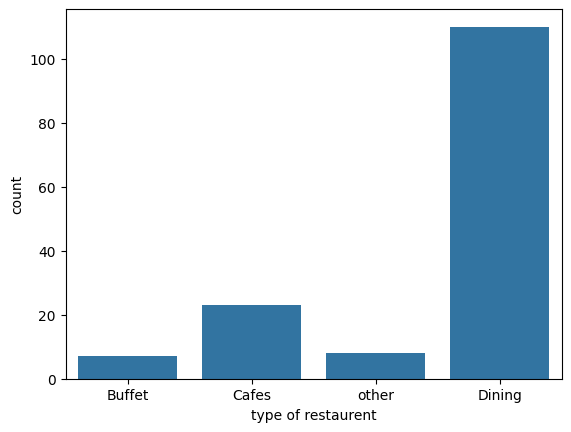

In [ ]:
#finding the listed_type on which maximum order are placed using seaborn library and matplotlib.
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x=df['listed_in(type)'])
plt.xlabel('type of restaurent')


In [ ]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0, 0.5, 'votes')

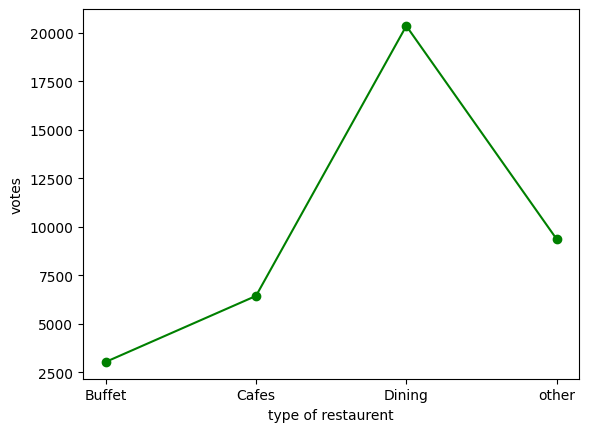

In [ ]:
#Finding which resturant gating maximum votes
#-> Dining get Maximum vots.
group_data=df.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'votes':group_data})
plt.plot(result,c='green',marker='o')
plt.xlabel('type of restaurent')
plt.ylabel('votes')

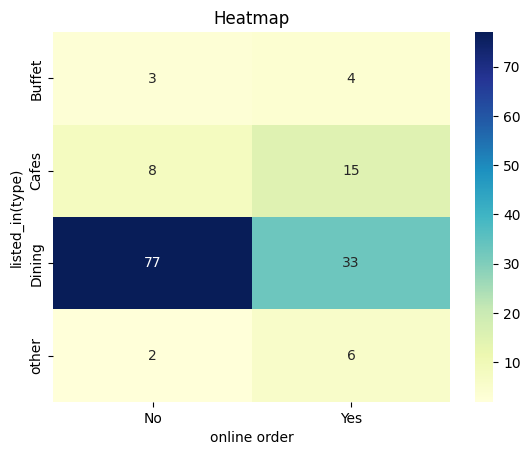

In [ ]:
pivot_table=df.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table,annot=True,cmap='YlGnBu',fmt='d')
plt.title('Heatmap')
plt.xlabel('online order')
plt.ylabel('listed_in(type)')
plt.show()